# Top coding, bottom coding and zero coding

## Outliers

An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are indeed sensitive to outliers and their performance might be impaired by them**. Thus, it is common practice to engineer the features to minimise the impact of outliers on the performance of these algorithms.


### Nature of outliers

- Genuine extremely high or extremely low values
- Introduced due to mechanical error (wrong measurement)
- Introduced by replacing missing values (NA) by a value out of the distribution (as described in previous lectures)

In some cases, the presence of outliers is informative, and therefore they deserve further study. In this course I will tackle the engineering of those values that do not add any particular extra information, and could as well be eliminated.  

## How can we pre-process outliers?

- Mean/median imputation or random sampling
- Discrestisation
- Discard the outliers: process also called Trimming
- Top-coding, bottom-coding and zero-coding: also known as windsorization


### Mean/median imputation or random sampling

If we have reasons to believe that the outliers are due to mechanical error or problems during measurement. This means, if the outliers are in nature similar to missing data, then any of the methods discussed for missing data can be applied to replace outliers. Because the number of outliers is in nature small (otherwise they would not be outliers), it is reasonable to use the mean/median imputation to replace them.

### Discretisation

Discretisation is the transformation of continuous variables into discrete variables. It involves assigning the variable values into defined groups. For example, for the variable age, we could group the observations (people) into buckets / groups like: 0-20, 21-40, 41-60, > 61. This grouping of the variables in ranges is called discretisation. As you can see, any outlier (extremely high) value of age would be included in the > 61 group, therefore minimising its impact. I will discuss more on the different discretisation methods in the "Discretisation" section of this course.

### Trimming

Trimming refers to the removal of the extreme values of a sample. In this procedure, the outliers are identified and those observations removed from the sample. On the down side, these values, may contain useful information for other variables included in the dataset. Thus, likely, we may choose not to remove these observations and handle outliers by top / bottom coding as described below.


## Top-coding, bottom-coding and zero-coding.

**Top-conding**, widely used in econometrics and statistics, means capping the maximum of a distribution at an arbitrarily set value. A top-coded variable is one for which data points whose values are above an upper bound are censored. This means in practical terms that all values above the upper band will be arbitrarily set to the upper band.

Top-coding is common practice in survey data, before it is released to the public. It is used to preserve the anonymity of respondents. For example, high earners may be easily identifiable by their earnings. Thus, by implementing top-coding, that outlier is capped at a certain maximum value and therefore looks like many other observations, it is not uniquely identifiable any more. Top-coding can be also applied to prevent possibly-erroneous outliers from being published.

Bottom-coding is analogous, but on the left side of the distribution. This is, all values below a certain threshold, are capped at that threshold. If the threshold is zero, then it is known as **zero-coding**, e.g. if amounts below zero are reported as zero. Good examples would be the variable "age", or the variable "earnings". It is not possible to have negative age or a negative salary, thus, it is reasonable to cap the lowest values at zero. Any observation with a value under zero must have been introduced by mistake.

Top-coding and bottom-coding are indeed used in practice to remove outliers of variables and therefore prevent model over-fitting. For an example in a financial institution, look at my talk in [pydata](https://www.google.co.uk/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=0ahUKEwiEtaG7p6fXAhVI2hoKHWqQBsMQtwIILTAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DKHGGlozsRtA&usg=AOvVaw13tQ7UEv3w1k_RLsEbB3aB).

#### Note

Top-coding may affect estimates of the standard errors of the variable, or change the variable distribution, by censoring those values at the far end of the tails.


### Identifying outliers

#### Extreme Value Analysis

The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then finding the values that sit at the very end of the tails.

In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

=======================================================================

Below I will demonstrate top-coding in real-life datasets. We have seen an intuition of how this improves machine learning algorithms in the lecture "Outliers" in the section "Type of problems within variables".

=============================================================================

## Real Life example: 

### Predicting Survival on the Titanic: understanding society behaviour and beliefs

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Lending Club

**Lending Club** is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns.

If you want to learn more about Lending Club follow this link:
https://www.lendingclub.com/

The Lending Club dataset contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features (aka variables) include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money.
The file is a matrix of about 890 thousand observations and 75 variables. More detail on this dataset can be found in Kaggle's website: https://www.kaggle.com/wendykan/lending-club-loan-data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None) # to display the total number columns present in the dataset

## Titanic dataset

In [2]:
%cd ../data_set/
# let's load the titanic dataset

data = pd.read_csv('titanic.csv')
data.head()

/home/pat/Desktop/Udemy_FeatureEngineering/data_set


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Top-coding important

Top-coding and bottom-coding, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap  the values in the test set.

In [3]:
# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

There are 2 numerical variables in this dataset, Fare and Age. So let's go ahead and find out whether there are values that we could consider outliers

### Fare

Text(0, 0.5, 'Number of Passengers')

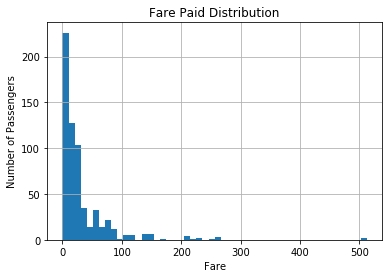

In [4]:
# First let's plot a histogram to get an idea of the distribution

fig = X_train.Fare.hist(bins=50)
fig.set_title('Fare Paid Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

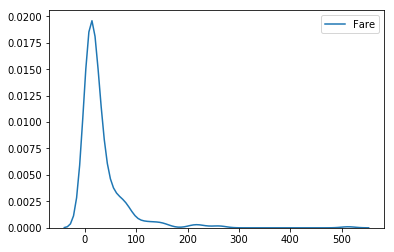

In [5]:
sns.kdeplot(X_train.Fare)

Because the distribution of Fare is skewed, we should estimate outliers using the quantile method instead of the Gaussian distribution.

Text(0, 0.5, 'Number of Passengers')

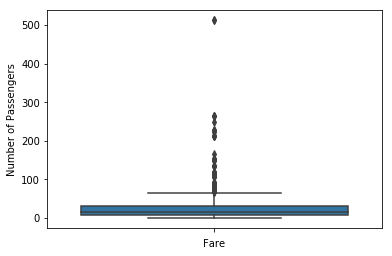

In [6]:
# visualising outliers using boxplots and whiskers, which provides the quantiles
# and inter-quantile range, with the outliers sitting outside the error bars.
# All the dots in the plot below are outliers according to the 1.5 IQR rule

fig = sns.boxplot(y='Fare', data=X_train)
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

The outliers, according to the above plot, lie all at the right side of the distribution. This is, some people paid extremely high prices for their tickets. 

Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding. Bottom coding in this case it is not necessary. At least not to improve the performance of the machine learning algorithms.

In [19]:
# let's look at the values of the quantiles so we can calculate the upper and lower boundaries for the outliers

X_train.Fare.describe()

count    623.000000
mean      27.650488
std       27.246454
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      100.000000
Name: Fare, dtype: float64

In [20]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Upper_fence = X_train.Fare.quantile(0.75) + (IQR * 3)

Upper_fence

100.6563

The upper boundary, above which every value is considered an outlier is a cost of 100 dollars for the Fare.

In [21]:
# lets look at the actual number of passengers that paid more than USS 100
print('total passengers: {}'.format(X_train.shape[0]))
print('passengers that paid more than 100: {}'.format(X_train[X_train.Fare>100].shape[0]))
print('percentage of outliers: {}'.format(X_train[X_train.Fare>100].shape[0]/np.float(X_train.shape[0])))

total passengers: 623
passengers that paid more than 100: 0
percentage of outliers: 0.0


In [22]:
# top-coding: capping the variable Fare at 100
X_train.loc[X_train.Fare>100, 'Fare'] = 100
X_test.loc[X_test.Fare>100, 'Fare'] = 100
X_train.Fare.max(), X_test.Fare.max()

(100.0, 100.0)

This is all we need to remove outliers from a machine learning perspective.

However, note that in the dataset, there are also a few passengers that paid zero for their tickets

In [23]:
X_train[X_train.Fare==0].shape

(7, 12)

In [24]:
X_train[X_train.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


The majority of them do not have a Cabin assigned, and could therefore have jumped on the boat illegally. Alternatively, there could also be that that information could not be retrieved, so we do not know how much they paid. But we do know that the cheapest ticket was 5 dollars, see below:

In [25]:
X_train[X_train.Fare!=0]['Fare'].min()

5.0

In situations like this, it is best to discuss with the data owner (in business, someone who knows the data well) the nature of the data, and the importance of the variable.

If the 0 values in this case mean that the data could not be retrieved properly, and therefore is in nature an NaN, one could choose to replace them by a random sample or mean/median imputation, or to do bottom-coding.

If the case of zero corresponds otherwise to people jumping on the boat illegally, one may choose to leave them as zero.

### Age

Text(0, 0.5, 'Number of Passengers')

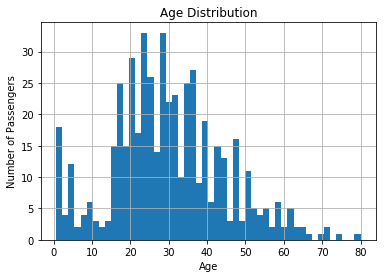

In [26]:
# First let's plot the histogram to get an idea of the distribution

fig = X_train.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

ValueError: array must not contain infs or NaNs

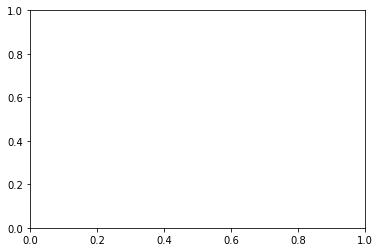

In [45]:
sns.kdeplot(X_train.Age)

Although it does not look strictly normal, we could assume normality and use the Gaussian approach to find outliers. See below.

Text(0, 0.5, 'Number of Passengers')

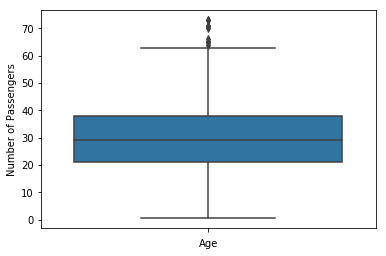

In [46]:
# now let's plot the boxplots and whiskers

fig = sns.boxplot(y='Age', data=X_train)
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Again, for this variable the outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding.

In [47]:
# and let's get the numbers to calculate the upper boundary
X_train.Age.describe()

count    502.000000
mean      29.899402
std       14.456032
min        0.670000
25%       21.000000
50%       29.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

In [48]:
# Assuming normality

Upper_boundary = X_train.Age.mean() + 3* X_train.Age.std()
Upper_boundary

73.26749796938452

In [49]:
# let's find out whether there are outliers according to the above boundaries
# remember that Age has ~ 20% missing values

total_passengers = np.float(X_train.shape[0])
print('total passengers: {}'.format(X_train.Age.dropna().shape[0]/total_passengers))
print('passengers older than 73 (Gaussian app): {}'.format(X_train[X_train.Age>73].shape[0]/total_passengers))

total passengers: 0.8057784911717496
passengers older than 73 (Gaussian app): 0.0


In [50]:
X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73

X_train.Age.max(), X_test.Age.max()

(73.0, 70.5)

In the test set, there were no outliers, as the maximum Age value is 70, below the value we used to cap outliers.

## Loan book from Lending Club

In [51]:
# we will examine only the income variable, as this is one that typically shows outliers.
# a few people are high earners, and the remaining of the borrowers fall within a normal-ish distribution

data = pd.read_csv('loan.csv', usecols=['annual_inc'], nrows=30000)
data.head()

,annual_inc
0,24000.0
1,30000.0
2,12252.0
3,49200.0
4,80000.0


(0, 500000)

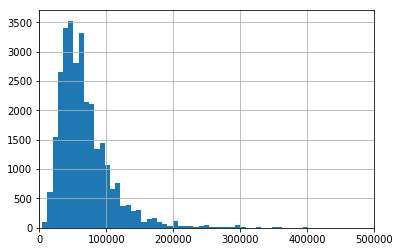

In [52]:
fig = data.annual_inc.hist(bins=500)
fig.set_xlim(0,500000)

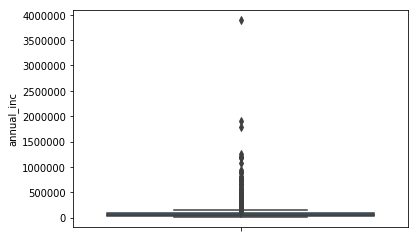

In [53]:
sns.boxplot(y='annual_inc', data=data)

As expected, outliers sit on the right of the distribution. Therefore, we will perform top-coding.

In [54]:
data.annual_inc.describe()

count    3.000000e+04
mean     6.913686e+04
std      5.528003e+04
min      4.080000e+03
25%      4.152720e+04
50%      6.000000e+04
75%      8.319997e+04
max      3.900000e+06
Name: annual_inc, dtype: float64

In [55]:
# because the distribution is not completely normal, I choose to examine outliers with the interquantal
# distance

IQR = data.annual_inc.quantile(0.75) - data.annual_inc.quantile(0.25)

Upper_fence = data.annual_inc.quantile(0.75) + (IQR * 1.5)
Upper_fence_ext = data.annual_inc.quantile(0.75) + (IQR * 3)

Upper_fence, Upper_fence_ext

(145709.125, 208218.28000000003)

In [56]:
# let's look at the percentage of high earners within each extreme bucket

total_borrowers = np.float(data.shape[0])
print('total borrowers: {}'.format(data.annual_inc.shape[0]/total_borrowers))
print('borrowers than earn > 146k: {}'.format(data[data.annual_inc>146000].shape[0]/total_borrowers))
print('borrowers than earn > 210k: {}'.format(data[data.annual_inc>210000].shape[0]/total_borrowers))

total borrowers: 1.0
borrowers than earn > 146k: 0.04593333333333333
borrowers than earn > 210k: 0.012133333333333333


In [57]:
# top-coding
data['annual_capped'] = np.where(data.annual_inc>210000, 210000, data.annual_inc)

data.describe()

,annual_inc,annual_capped
count,3.000000e+04,30000.000000
mean,6.913686e+04,67439.817264
std,5.528003e+04,37537.869513
min,4.080000e+03,4080.000000
25%,4.152720e+04,41527.200000
50%,6.000000e+04,60000.000000
75%,8.319997e+04,83199.970000
max,3.900000e+06,210000.000000


We see the effect of capping on the overall distribution of the variable. The standard deviation is smaller, and so is the maximum value.

(0, 500000)

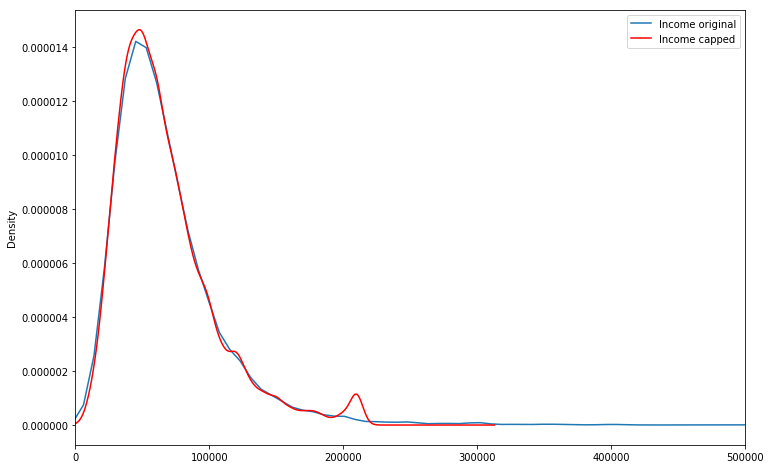

In [58]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
data.annual_inc.plot(kind='kde', ax=ax)
data.annual_capped.plot(kind='kde', ax=ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Income original', 'Income capped']
ax.legend(lines, labels, loc='best')
ax.set_xlim(0,500000)

We can observe the effect of top codding on the variable distribution. The maximum value corresponds now to the value we set as a cap. And we observe a peak in that value, that indicates that people that earn more than the cap, are now grouped together under a capped maximum salary.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**